In [1]:
import torch
import sys

sys.path.append('/home/afahim2/tmp/clip-project/clipverse')


from clips.clip_assembler import ClipAssembler
from src.evaluator import Evaluator
from dataset_processors.mscoco_processor import MSCOCOProcessor

from src.prepare_config import prepare_config
from clips.hf_clip import HFClipOutput, HFClip

/home/afahim2/miniconda3/envs/babylm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import importlib
importlib.reload(sys.modules['dataset_processors'].mscoco_processor)
importlib.reload(sys.modules['src'].evaluator)
importlib.reload(sys.modules['src'].prepare_config)

<module 'src.prepare_config' from '/home/afahim2/tmp/clip-project/clipverse/src/prepare_config.py'>

In [2]:
cuda_device = 'cuda:0'
ROOT = '/home/afahim2/tmp/clip-project/clipverse'

In [3]:
mscoco_paths = {
        # 128D

        # Seed 42
        'mscoco_default_128d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_42_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',
        'mscoco_cua_128d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_42_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL3.pt',
        'mscoco_cuaxu_128d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_42_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',

        # Seed 24

        'mscoco_default_128d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_24_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_128d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_24_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_128d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_24_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

        # Seed = 44
        'mscoco_default_128d_s44':  '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_128d_s44':  '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_128d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

        # 64D

        'mscoco_default_64d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_42_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',
        'mscoco_cua_64d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_42_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL3.pt',
        'mscoco_cuaxu_64d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_42_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',

        'mscoco_default_64d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_24_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_64d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_24_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_64d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_24_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

        'mscoco_default_64d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_44_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_64d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_44_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_64d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_44_finetune_I1C2E1E2_64_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

        # 32D

        'mscoco_default_32d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_42_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',
        'mscoco_cua_32d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_42_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL3.pt',
        'mscoco_cuaxu_32d_s42': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_42_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_EVAL.pt',

        'mscoco_default_32d_s24':  '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_24_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_32d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_24_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_32d_s24': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_24_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

        'mscoco_default_32d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lit_44_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cua_32d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_44_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
        'mscoco_cuaxu_32d_s44': '/remote/cirrus-home/afahim2/tmp/clip-project/clipverse/checkpoints/T0.01_Lituniform_align_xuniform_44_finetune_I1C2E1E2_32_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',

    }

### Load Dataset

In [4]:
val_batch_cache_file = f'{ROOT}/datasets/mscoco/val_batch_cache_mscoco_full_5k.pt'


### Evaluate CLIP models

In [5]:

def get_gap_stuff(evaluator: Evaluator, clip_model: HFClip):
    # ranks = evaluator.get_rank(linalg=False)
   

    return {
        'mean_cosine_similarity': evaluator.get_mean_cosine_similarity(clip_model.get_temperature()),
        'linear_seperability_accuracy': evaluator.get_linear_seperability(),
        'centroid_euclidean_distance': evaluator.get_centroid_euclidean_distance(),

        'val_image_classification_acc': evaluator.get_val_image_classification_acc(return_all=True),

        'get_val_image_retrieval_acc': evaluator.get_val_image_retrieval_acc(return_all=True),

        # 'image_variances': ranks['image_explained_variance_ratios'],
        # 'text_variances': ranks['text_explained_variance_ratios'],

        # 'uniformity_loss': evaluator.get_mscoco_uniformity(),
        # 'alignment_loss': evaluator.get_mscoco_alignment(),
        
    }

In [6]:
def plot_embeddings(evaluator: Evaluator, clip_model: HFClip):
    evaluator.plot_embeddings(clip_model)
    

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt



device = torch.device(cuda_device if torch.cuda.is_available() else 'cpu')

gap_metrics = {}
# have same keys in gap_metrics as in mscoco_paths

with torch.no_grad():


    for model_name, model_path in mscoco_paths.items():
        print(' --- ')
        print(f'Processing {model_name}')
        print()
        dimensionality = int(model_name.split("_")[2].split("d")[0])

        prepare_config(clip_projection_dim=dimensionality, cuda_device=cuda_device, seed=2, wandb_enabled=False)
        loaded_clip_model = ClipAssembler().clip_model.to(device)
        checkpoint = torch.load(model_path, map_location=device)
        model_state_dict = checkpoint['model_state_dict']
        loaded_clip_model.load_state_dict(model_state_dict)

        loaded_clip_model.eval()
        loaded_clip_model.half()

        



        evaluator = Evaluator(MSCOCOProcessor(root=ROOT), val_batch_cache_file, load_train_dataset=False)

        evaluator.set_val_outputs(loaded_clip_model, output_loss=False)
        evaluator.set_outputs_to_use('val')

        gap_stuff = get_gap_stuff(evaluator, loaded_clip_model)

        gap_metrics[model_name] = gap_stuff

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


 --- 
Processing mscoco_default_128d_s42

--- config_cuda_device = cuda:0 ---

--- ENCODER 1 = IMAGE --- 


 --- Initializing CLIP Image Encoder from pretrained model ---


 --- Changing projection layer size of CLIP Image Encoder: VIT  to 128--- 


 --- Unfreezing backbone weights of CLIP Image Encoder: VIT  --- 


--- ENCODER 2 = TEXT --- 


 --- Initializing Text Encoder with CLIP tokenizer from pretrained model ---


 --- Changing projection layer size of Text Encoder with CLIP tokenizer to 128  --- 


 --- Unfreezing backbone weights of Text Encoder with CLIP tokenizer --- 

CLIP device  cuda:0
check point path for CLIP model  checkpoints/T0.01_Lit_2_finetune_I1C2E1E2_128_val_as_val_5000_mscoco_VIT_pretrained_POST_PAPER.pt
CLIP model not loaded from checkpoint

--- HF CLIP MODEL ---

selected clip model  FINETUNED_TEMP
temperature (T):  0.01
loading annotations into memory...
Done (t=1.75s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating

KeyboardInterrupt: 

### Plotting Embeddings

 --- 
Processing Default 512D CLIP

--- config_cuda_device = cuda:0 ---

--- ENCODER 1 = IMAGE --- 


 --- Initializing CLIP Image Encoder from pretrained model ---


 --- Changing projection layer size of CLIP Image Encoder: VIT  to 512--- 


 --- Unfreezing backbone weights of CLIP Image Encoder: VIT  --- 


--- ENCODER 2 = TEXT --- 


 --- Initializing Text Encoder with CLIP tokenizer from pretrained model ---


 --- Changing projection layer size of Text Encoder with CLIP tokenizer to 512  --- 


 --- Unfreezing backbone weights of Text Encoder with CLIP tokenizer --- 

CLIP device  cuda:0
check point path for CLIP model  checkpoints/T0.01_Lit_2_finetune_I1C2E1E2_512_val_as_val_5000_mscoco_VIT_pretrained_POST_PAPER.pt
CLIP model not loaded from checkpoint

--- HF CLIP MODEL ---

selected clip model  FINETUNED_TEMP
temperature (T):  0.01
loading annotations into memory...
Done (t=1.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index

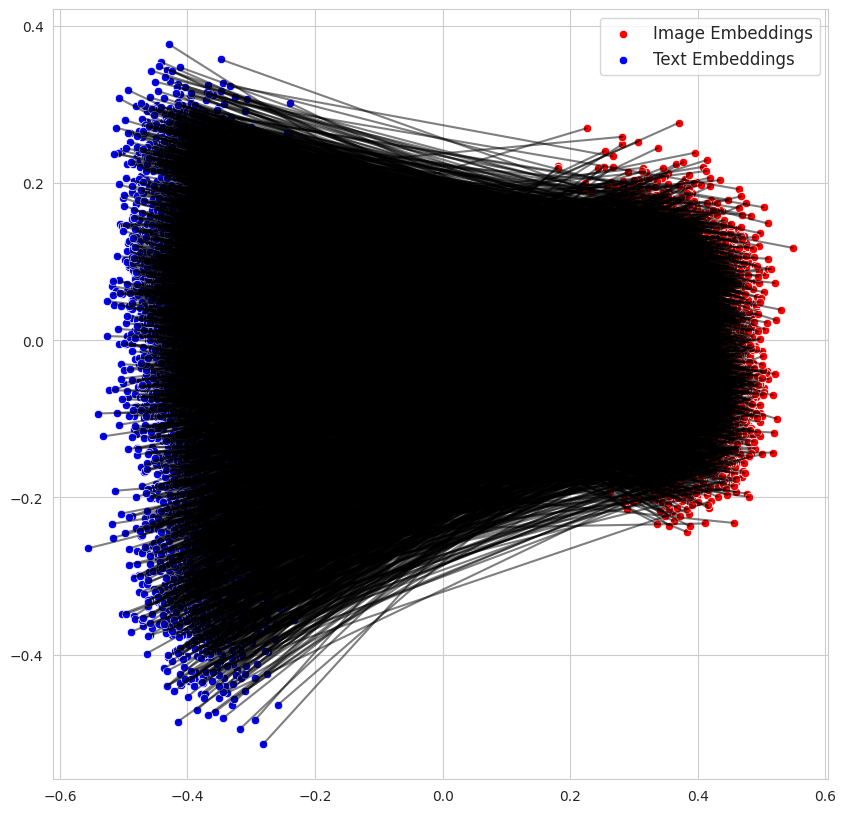

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device(cuda_device if torch.cuda.is_available() else 'cpu')


with torch.no_grad():


    print(' --- ')
    print(f'Processing Default 512D CLIP')
    print()
    # dimensionality = int(model_name.split("_")[2].split("d")[0])

    prepare_config(clip_projection_dim=512, cuda_device=cuda_device, seed=2, wandb_enabled=False)
    loaded_clip_model = ClipAssembler().clip_model.to(device)
    # checkpoint = torch.load(model_path, map_location=device)
    # model_state_dict = checkpoint['model_state_dict']
    # loaded_clip_model.load_state_dict(model_state_dict)

    loaded_clip_model.eval()
    loaded_clip_model.half()

    



    evaluator = Evaluator(MSCOCOProcessor(root=ROOT), val_batch_cache_file, load_train_dataset=False)

    evaluator.set_val_outputs(loaded_clip_model, output_loss=False)
    evaluator.set_outputs_to_use('val')

    encoder1_embeddings = evaluator.val_outputs.image_embeds
    encoder2_embeddings = evaluator.val_outputs.text_embeds

    # normalize embeddings
    encoder1_embeddings = encoder1_embeddings / torch.norm(encoder1_embeddings, dim=1, keepdim=True)
    encoder2_embeddings = encoder2_embeddings / torch.norm(encoder2_embeddings, dim=1, keepdim=True)

    # pca to 2d

    all_embeddings = torch.cat((encoder1_embeddings, encoder2_embeddings), dim=0)

    if not evaluator.pca_fitted:
        evaluator.pca.fit(all_embeddings.cpu().numpy())
        evaluator.pca_fitted = True
    
    all_embeddings_pca = evaluator.pca.transform(all_embeddings.cpu().numpy())

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 10))

    sns.scatterplot(x=all_embeddings_pca[:encoder1_embeddings.shape[0], 0], y=all_embeddings_pca[:encoder1_embeddings.shape[0], 1], label='Image Embeddings', color='red')
    sns.scatterplot(x=all_embeddings_pca[encoder1_embeddings.shape[0]:, 0], y=all_embeddings_pca[encoder1_embeddings.shape[0]:, 1], label='Text Embeddings', color='blue')

     # # draw lines between embeddings
    for i in range(encoder1_embeddings.shape[0]):
        plt.plot([all_embeddings_pca[i, 0], all_embeddings_pca[i + encoder1_embeddings.shape[0], 0]], [all_embeddings_pca[i, 1], all_embeddings_pca[i + encoder1_embeddings.shape[0], 1]], color='black', alpha=0.5)

    # dont show numbers on x and y axis


    # plt.legend()
    # increase legend font size
    plt.legend(fontsize='large')

    plt.savefig(f'{ROOT}/figures/512d_default_mod_gap_lines.png')
    plt.show()





    # plot
    # plt.scatter(all_embeddings_pca[:encoder1_embeddings.shape[0], 0], all_embeddings_pca[:encoder1_embeddings.shape[0], 1], label='image', color='red')
    # plt.scatter(all_embeddings_pca[encoder1_embeddings.shape[0]:, 0], all_embeddings_pca[encoder1_embeddings.shape[0]:, 1], label='text', color='blue')



   

    # fix x and y limits
    # plt.xlim(-0.5, 0.5)
    # plt.ylim(-0.5, 0.5)

    # plt.legend()
    # plt.show()

    # evaluator.plot_embeddings()

    # gap_stuff = get_gap_stuff(evaluator, loaded_clip_model)

    # gap_metrics[model_name] = gap_stuff

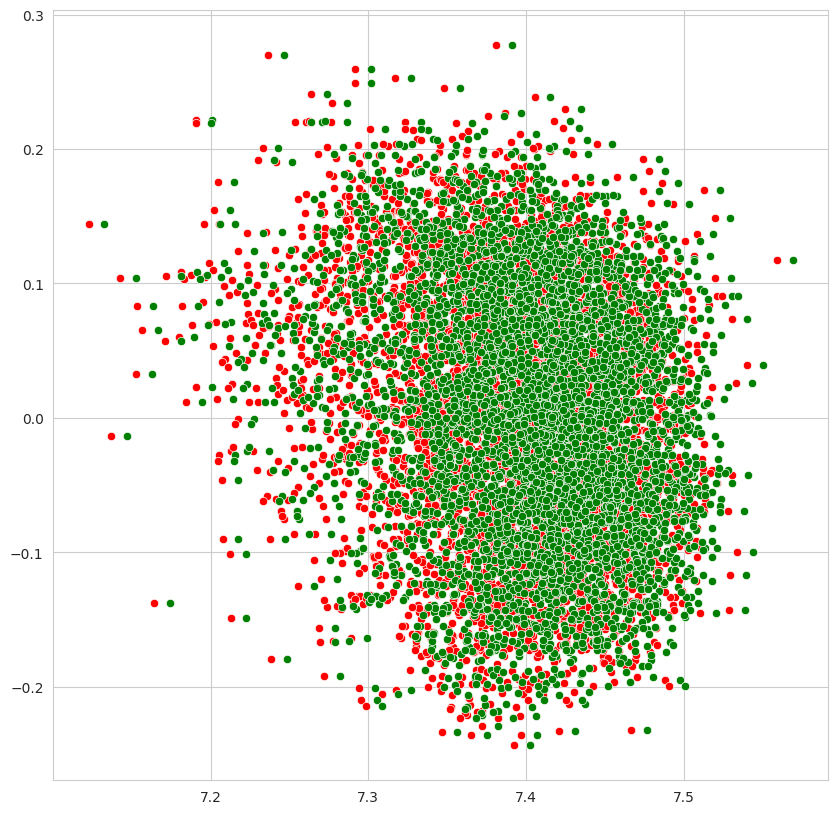

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))

sns.scatterplot(x=all_embeddings_pca[:encoder1_embeddings.shape[0], 0], y=all_embeddings_pca[:encoder1_embeddings.shape[0], 1], label='Image Embeddings', color='red')

# translate image embeddings to the right
all_embeddings_pca[:encoder1_embeddings.shape[0], 0] += 0.01

sns.scatterplot(x=all_embeddings_pca[:encoder1_embeddings.shape[0], 0], y=all_embeddings_pca[:encoder1_embeddings.shape[0], 1], label='Image Embeddings', color='green')




# sns.scatterplot(x=all_embeddings_pca[encoder1_embeddings.shape[0]:, 0], y=all_embeddings_pca[encoder1_embeddings.shape[0]:, 1], label='Text Embeddings', color='blue')

# encoder1_centroid = np.mean(all_embeddings_pca[:encoder1_embeddings.shape[0], :], axis=0)
# encoder2_centroid = np.mean(all_embeddings_pca[encoder1_embeddings.shape[0]:, :], axis=0)

# # draw a vertical line at x=0
# plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)



    # # draw lines between embeddings
# for i in range(encoder1_embeddings.shape[0]):
#     plt.plot([all_embeddings_pca[i, 0], all_embeddings_pca[i + encoder1_embeddings.shape[0], 0]], [all_embeddings_pca[i, 1], all_embeddings_pca[i + encoder1_embeddings.shape[0], 1]], color='black', alpha=0.1)
# for i in range(encoder1_embeddings.shape[0]):

# plot encoder1 centroid
# use bold black x
# plt.scatter(encoder1_centroid[0], encoder1_centroid[1], color='black', marker='x', s=400, linewidths=5)
# plt.scatter(encoder2_centroid[0], encoder2_centroid[1], color='black', marker='x', s=400, linewidths=5)

# plot line between centroids
# plt.plot([encoder1_centroid[0], encoder2_centroid[0]], [encoder1_centroid[1], encoder2_centroid[1]], color='black', alpha=1)




# for i in range(100):
#     plt.plot([all_embeddings_pca[i, 0], all_embeddings_pca[i + encoder1_embeddings.shape[0], 0]], [all_embeddings_pca[i, 1], all_embeddings_pca[i + encoder1_embeddings.shape[0], 1]], color='black', alpha=0.3)



# show grid, but dont show numbers on x and y axis
plt.grid(True)





# plt.legend()
# increase legend font size
# plt.legend(fontsize='large')

# turn legend off
plt.legend().set_visible(False)


plt.savefig(f'{ROOT}/figures/512d_default_mod_gap_toy_images_overlap.png')
plt.show()

In [7]:
gap_metrics

{'mscoco_default_128d_s42': {'mean_cosine_similarity': 0.5908203125,
  'linear_seperability_accuracy': 1.0,
  'centroid_euclidean_distance': 0.60595703125,
  'val_image_classification_acc': {1: 0.2773075372833535,
   3: 0.47339782345828296,
   5: 0.5713422007255139,
   10: 0.7067714631197098},
  'get_val_image_retrieval_acc': {1: 0.2750906892382104,
   3: 0.47158403869407495,
   5: 0.5689238210399032,
   10: 0.6948810963321241}},
 'mscoco_cua_128d_s42': {'mean_cosine_similarity': 0.73193359375,
  'linear_seperability_accuracy': 0.730110775427996,
  'centroid_euclidean_distance': 0.07952880859375,
  'val_image_classification_acc': {1: 0.25413139862958484,
   3: 0.43611446997178555,
   5: 0.5392986698911729,
   10: 0.6781539701733172},
  'get_val_image_retrieval_acc': {1: 0.24727932285368803,
   3: 0.44155582426440954,
   5: 0.5380894800483675,
   10: 0.658806932688432}},
 'mscoco_cuaxu_128d_s42': {'mean_cosine_similarity': 0.6533203125,
  'linear_seperability_accuracy': 0.79506545820745

In [8]:
# write gap metrics to a file
# import json
# with open('gap_metrics.json', 'w') as f:
#     json.dump(gap_metrics, f)


### Read Saved gap metrics starting here

In [1]:
cuda_device = 'cuda:0'
ROOT = '/home/afahim2/tmp/clip-project/clipverse'

In [2]:
# read gap metrics from a file
import json
with open('gap_metrics.json', 'r') as f:
    gap_metrics = json.load(f)
    

In [3]:
# create new dictionary, with keys for each dimensionality

gap_metrics_by_dimensionality = {}

for model_name, gap_stuff in gap_metrics.items():
    dimensionality = int(model_name.split("_")[2].split("d")[0])
    if dimensionality not in gap_metrics_by_dimensionality:
        gap_metrics_by_dimensionality[dimensionality] = {}
    gap_metrics_by_dimensionality[dimensionality][model_name] = gap_stuff

gap_metrics_by_dimensionality

{128: {'mscoco_default_128d_s42': {'mean_cosine_similarity': 0.5908203125,
   'linear_seperability_accuracy': 1.0,
   'centroid_euclidean_distance': 0.60595703125,
   'val_image_classification_acc': {'1': 0.2773075372833535,
    '3': 0.47339782345828296,
    '5': 0.5713422007255139,
    '10': 0.7067714631197098},
   'get_val_image_retrieval_acc': {'1': 0.2750906892382104,
    '3': 0.47158403869407495,
    '5': 0.5689238210399032,
    '10': 0.6948810963321241}},
  'mscoco_cua_128d_s42': {'mean_cosine_similarity': 0.73193359375,
   'linear_seperability_accuracy': 0.730110775427996,
   'centroid_euclidean_distance': 0.07952880859375,
   'val_image_classification_acc': {'1': 0.25413139862958484,
    '3': 0.43611446997178555,
    '5': 0.5392986698911729,
    '10': 0.6781539701733172},
   'get_val_image_retrieval_acc': {'1': 0.24727932285368803,
    '3': 0.44155582426440954,
    '5': 0.5380894800483675,
    '10': 0.658806932688432}},
  'mscoco_cuaxu_128d_s42': {'mean_cosine_similarity': 0.65

In [4]:
# seperate dictionaries for each metric
gap_metrics_grouped = {
    'mean_cosine_similarity': {},
    'linear_seperability_accuracy': {},
    'centroid_euclidean_distance': {},
    'val_image_classification_acc': {},
    'get_val_image_retrieval_acc': {},
}

# within each metric, have dictionaries for each dimensionality, then within that, have dictionaries grouped by loss type

# within each loss type, have a list of values for each model

for metric_name, metric_dict in gap_metrics_grouped.items():
    for dimensionality, model_dict in gap_metrics_by_dimensionality.items():
        metric_dict[dimensionality] = {}
        for model_name, gap_stuff in model_dict.items():
            loss_type = model_name.split("_")[1]
            if loss_type not in metric_dict[dimensionality]:
                metric_dict[dimensionality][loss_type] = []
            metric_dict[dimensionality][loss_type].append(gap_stuff[metric_name])



gap_metrics_grouped


{'mean_cosine_similarity': {128: {'default': [0.5908203125,
    0.5556640625,
    0.5537109375],
   'cua': [0.73193359375, 0.72314453125, 0.7294921875],
   'cuaxu': [0.6533203125, 0.62744140625, 0.62890625]},
  64: {'default': [0.82568359375, 0.83544921875, 0.81494140625],
   'cua': [0.77392578125, 0.77197265625, 0.77294921875],
   'cuaxu': [0.7001953125, 0.68896484375, 0.69384765625]},
  32: {'default': [0.90625, 0.9111328125, 0.90869140625],
   'cua': [0.814453125, 0.810546875, 0.814453125],
   'cuaxu': [0.7685546875, 0.7529296875, 0.75244140625]}},
 'linear_seperability_accuracy': {128: {'default': [1.0, 1.0, 1.0],
   'cua': [0.730110775427996, 0.7381671701913394, 0.7109768378650554],
   'cuaxu': [0.7950654582074521, 0.8076535750251762, 0.8474320241691843]},
  64: {'default': [0.999496475327291, 1.0, 1.0],
   'cua': [0.6581067472306144, 0.6606243705941591, 0.6253776435045317],
   'cuaxu': [0.756797583081571, 0.7663645518630413, 0.7829808660624371]},
  32: {'default': [0.687311178247

    Dimensionality     Loss  Mean Cosine Similarity
0              128  Default                0.590820
2              128  Default                0.553711
20              32  Default                0.908691
19              32  Default                0.911133
18              32  Default                0.906250
9               64  Default                0.825684
10              64  Default                0.835449
11              64  Default                0.814941
1              128  Default                0.555664
15              64    CUAXU                0.700195
25              32    CUAXU                0.752930
24              32    CUAXU                0.768555
17              64    CUAXU                0.693848
16              64    CUAXU                0.688965
26              32    CUAXU                0.752441
8              128    CUAXU                0.628906
7              128    CUAXU                0.627441
6              128    CUAXU                0.653320
14          

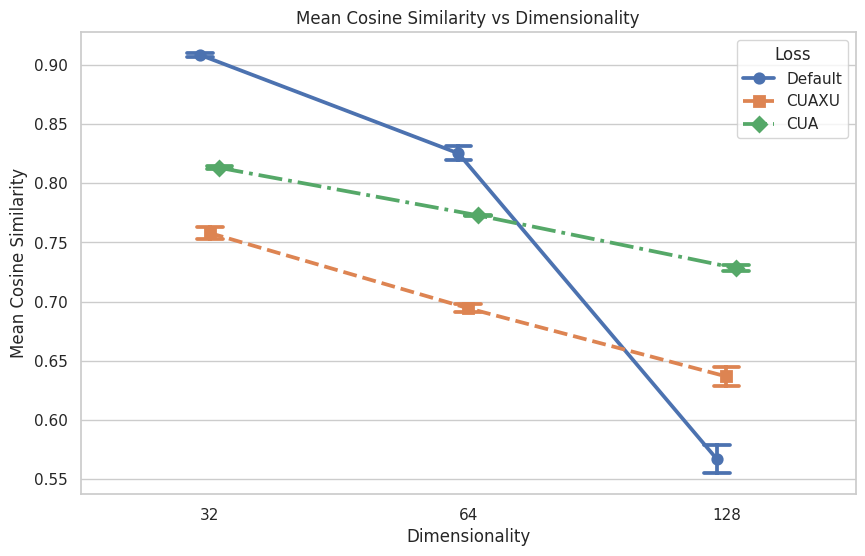

    Dimensionality     Loss  Linear Seperability Accuracy
0              128  Default                      1.000000
2              128  Default                      1.000000
20              32  Default                      0.872105
19              32  Default                      0.787513
18              32  Default                      0.687311
9               64  Default                      0.999496
10              64  Default                      1.000000
11              64  Default                      1.000000
1              128  Default                      1.000000
15              64    CUAXU                      0.756798
25              32    CUAXU                      0.677744
24              32    CUAXU                      0.594159
17              64    CUAXU                      0.782981
16              64    CUAXU                      0.766365
26              32    CUAXU                      0.774421
8              128    CUAXU                      0.847432
7             

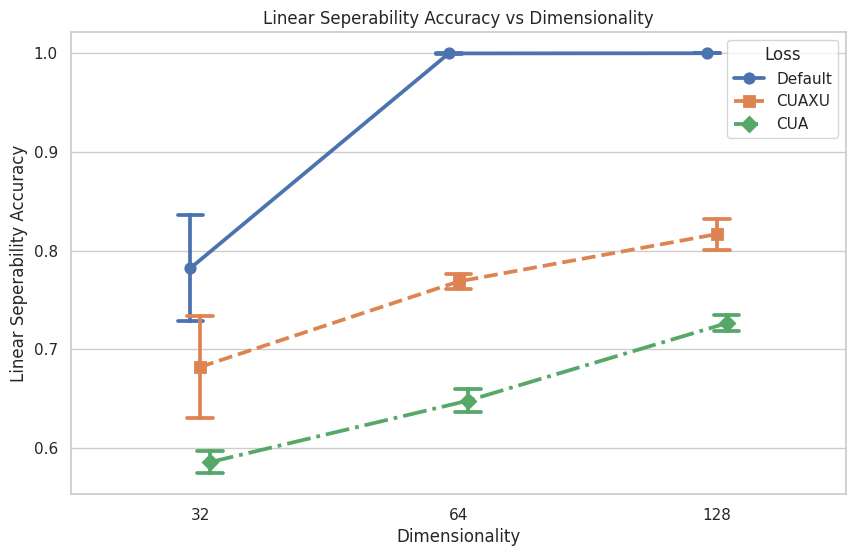

    Dimensionality     Loss  Centroid Euclidean Distance
0              128  Default                     0.605957
2              128  Default                     0.694336
20              32  Default                     0.126099
19              32  Default                     0.104126
18              32  Default                     0.082703
9               64  Default                     0.283447
10              64  Default                     0.291748
11              64  Default                     0.366455
1              128  Default                     0.682129
15              64    CUAXU                     0.130249
25              32    CUAXU                     0.122803
24              32    CUAXU                     0.072876
17              64    CUAXU                     0.134155
16              64    CUAXU                     0.143921
26              32    CUAXU                     0.170410
8              128    CUAXU                     0.132080
7              128    CUAXU    

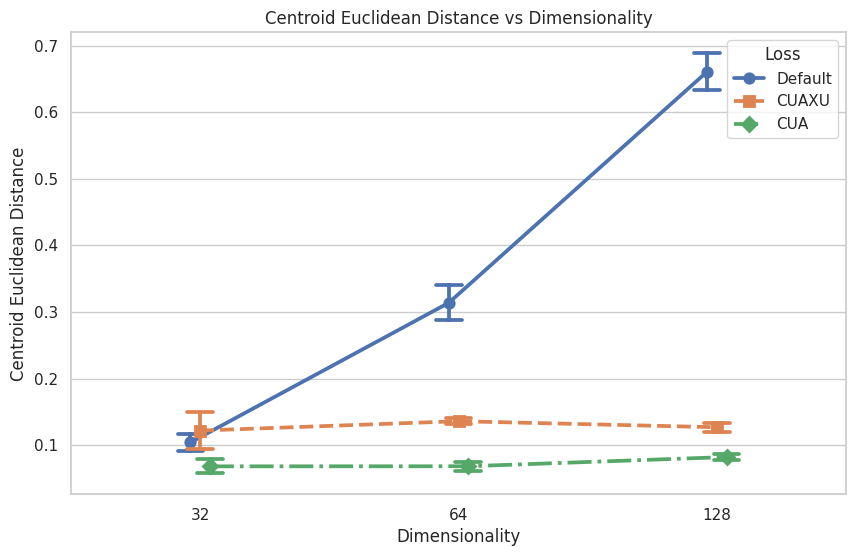

In [6]:
# use sns to plot the data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# create a dataframe for each metric



# use raw data to plot
# use pointplot, have dimensionalities in x axis, and values in y axis

metrics_to_plot = ['mean_cosine_similarity', 'linear_seperability_accuracy', 'centroid_euclidean_distance']

# have different colors for each loss type
for metric_name, metric_dict in gap_metrics_grouped.items():
    if metric_name not in metrics_to_plot:
        continue
    data = []
    # create dataframe here only, dont plot
    for dimensionality, gap_values in metric_dict.items():
        for loss_name, loss_gap_values in gap_values.items():
            for score in loss_gap_values:
                data.append({'Dimensionality': dimensionality, 'Loss': loss_name.upper() if loss_name != 'default' else 'Default', f'{metric_name.replace("_", " ").title()}': score})

    df = pd.DataFrame(data)

    # sort the df by Loss
    df = df.sort_values(by=['Loss'], ascending=False)

    # print the df
    print(df)

    plt.figure(figsize=(10, 6))
    sns.set(style='whitegrid')
    sns.pointplot(data=df, x='Dimensionality', y=f'{metric_name.replace("_", " ").title()}', hue='Loss', dodge=True, markers=['o', 's', 'D'], linestyles=['-', '--', '-.'], palette='deep', errorbar=('se', 1), capsize=.1)

    plt.title(f'{metric_name.replace("_", " ").title()} vs Dimensionality')
    plt.savefig(f'{ROOT}/figures/{metric_name}_vs_dimensionality.png')
    plt.show()

    # save the plot
    
    

        
